# Feature Scaling

We often encounter different types of variables in the same dataset. A significant issue is that the range of the variables may differ a lot. Using the original scale may put more weights on the variables with a large range. In order to deal with this problem, we need to apply the technique of features rescaling to independent variables or features of data in the step of data pre-processing. 

#### What is Standardization?
Standardization is another scaling technique where the values are centered around the mean with a unit standard deviation. This means that the mean of the attribute becomes zero and the resultant distribution has a unit standard deviation.

Here’s the formula for standardization:
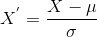

Mu is the mean of the feature values and Feature scaling: Sigma is the standard deviation of the feature values. Note that in this case, the values are not restricted to a particular range.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
df = pd.read_csv('titanic.csv', usecols = ['Pclass','Age','Fare','Survived'])
df.head()

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


In [4]:
df.Age.fillna(df.Age.median(), inplace = True)

In [6]:
df.isnull().sum()

Survived    0
Pclass      0
Age         0
Fare        0
dtype: int64

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,891.0,29.361582,13.019697,0.42,22.0000,28.0000,35.0,80.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

In [10]:
scaled_df

array([[-0.78927234,  0.82737724, -0.56573646, -0.50244517],
       [ 1.2669898 , -1.56610693,  0.66386103,  0.78684529],
       [ 1.2669898 ,  0.82737724, -0.25833709, -0.48885426],
       ...,
       [-0.78927234,  0.82737724, -0.1046374 , -0.17626324],
       [ 1.2669898 , -1.56610693, -0.25833709, -0.04438104],
       [-0.78927234,  0.82737724,  0.20276197, -0.49237783]])

(array([216.,   0.,   0.,   0.,   0., 184.,   0.,   0.,   0., 491.]),
 array([-1.56610693, -1.32675851, -1.08741009, -0.84806167, -0.60871326,
        -0.36936484, -0.13001642,  0.10933199,  0.34868041,  0.58802883,
         0.82737724]),
 <BarContainer object of 10 artists>)

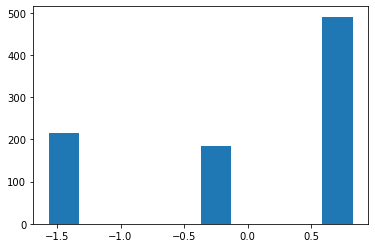

In [12]:
plt.hist(scaled_df[:,1], bins = 10)

(array([ 54.,  46., 177., 346., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([-2.22415608, -1.61258503, -1.00101397, -0.38944292,  0.22212813,
         0.83369919,  1.44527024,  2.05684129,  2.66841235,  3.2799834 ,
         3.89155445]),
 <BarContainer object of 10 artists>)

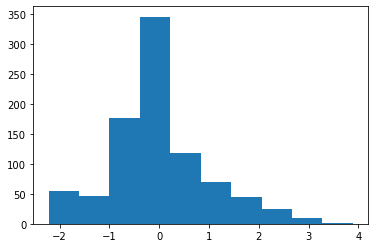

In [13]:
plt.hist(scaled_df[:,2], bins = 10)

(array([732., 106.,  31.,   2.,  11.,   6.,   0.,   0.,   0.,   3.]),
 array([-0.64842165,  0.38313716,  1.41469598,  2.4462548 ,  3.47781362,
         4.50937244,  5.54093125,  6.57249007,  7.60404889,  8.63560771,
         9.66716653]),
 <BarContainer object of 10 artists>)

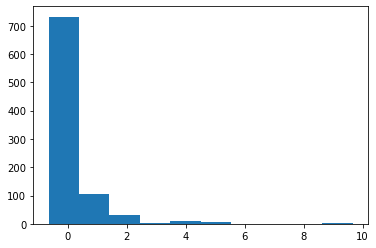

In [14]:
plt.hist(scaled_df[:,3], bins = 10)

#### What is Normalization/ Min-Max Scaling
Normalization is a scaling technique in which values are shifted and rescaled so that they end up ranging between 0 and 1. It is also known as Min-Max scaling.
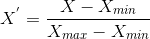

Here, Xmax and Xmin are the maximum and the minimum values of the feature respectively.

* When the value of X is the minimum value in the column, the numerator will be 0, and hence X’ is 0
* On the other hand, when the value of X is the maximum value in the column, the numerator is equal to the denominator and thus the value of X’ is 1
* If the value of X is between the minimum and the maximum value, then the value of X’ is between 0 and 1



In [15]:
from sklearn.preprocessing import MinMaxScaler

In [16]:
scaler = MinMaxScaler()
df_minmax = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)
df_minmax.head()

,Survived,Pclass,Age,Fare
0,0.0,1.0,0.271174,0.014151
1,1.0,0.0,0.472229,0.139136
2,1.0,1.0,0.321438,0.015469
3,1.0,0.0,0.434531,0.103644
4,0.0,1.0,0.434531,0.015713


(array([549.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 342.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

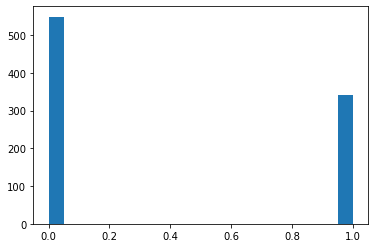

In [21]:
plt.hist(df_minmax['Survived'], bins = 20)

(array([216.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 184.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 491.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

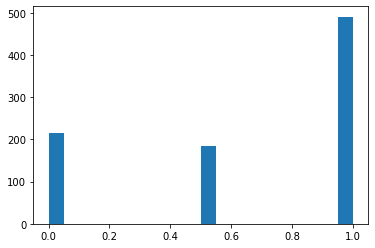

In [22]:
plt.hist(df_minmax['Pclass'], bins = 20)

(array([ 40.,  14.,  15.,  31.,  79.,  98., 262.,  84.,  73.,  45.,  35.,
         35.,  29.,  16.,  13.,  11.,   4.,   5.,   1.,   1.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

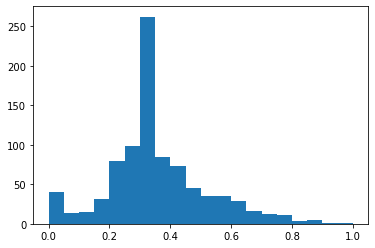

In [23]:
plt.hist(df_minmax['Age'], bins = 20)

(array([562., 170.,  67.,  39.,  15.,  16.,   2.,   0.,   9.,   2.,   6.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

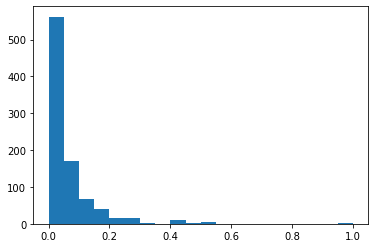

In [24]:
plt.hist(df_minmax['Fare'], bins = 20)

#### When Should You Use Normalization And Standardization:
<b>Normalization</b> is a good technique to use when you do not know the distribution of your data or when you know the distribution is not Gaussian (a bell curve). Normalization is useful when your data has varying scales and the algorithm you are using does not make assumptions about the distribution of your data, such as k-nearest neighbors and artificial neural networks.

<b>Standardization</b> assumes that your data has a Gaussian (bell curve) distribution. This does not strictly have to be true, but the technique is more effective if your attribute distribution is Gaussian. Standardization is useful when your data has varying scales and the algorithm you are using does make assumptions about your data having a Gaussian distribution, such as linear regression, logistic regression, and linear discriminant analysis.

### Robust Scaler
Robust Scaler algorithms scale features that are robust to outliers. The method it follows is almost similar to the MinMax Scaler but it uses the interquartile range (rather than the min-max used in MinMax Scaler). The median and scales of the data are removed by this scaling algorithm according to the quantile range.

It, thus, follows the following formula:

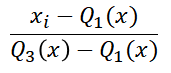

Where Q1 is the 1st quartile, and Q3 is the third quartile

In [26]:
from sklearn.preprocessing import RobustScaler

In [27]:
scaler = RobustScaler()
df_robust = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)
df_robust.head()

,Survived,Pclass,Age,Fare
0,0.0,0.0,-0.461538,-0.312011
1,1.0,-2.0,0.769231,2.461242
2,1.0,0.0,-0.153846,-0.282777
3,1.0,-2.0,0.538462,1.673732
4,0.0,0.0,0.538462,-0.277363


In [29]:
df_minmax.columns

Index(['Survived', 'Pclass', 'Age', 'Fare'], dtype='object')

(array([549.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 342.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

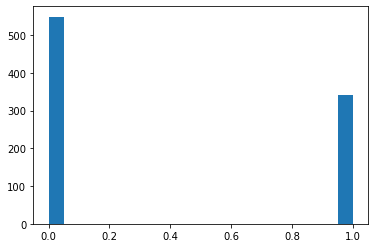

In [30]:
plt.hist(df_robust['Survived'], bins = 20)

(array([216.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 184.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 491.]),
 array([-2. , -1.9, -1.8, -1.7, -1.6, -1.5, -1.4, -1.3, -1.2, -1.1, -1. ,
        -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1,  0. ]),
 <BarContainer object of 20 artists>)

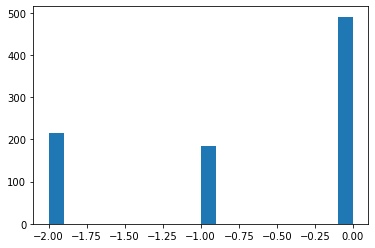

In [31]:
plt.hist(df_robust['Pclass'], bins = 20)

(array([ 40.,  14.,  15.,  31.,  79.,  98., 262.,  84.,  73.,  45.,  35.,
         35.,  29.,  16.,  13.,  11.,   4.,   5.,   1.,   1.]),
 array([-2.12153846, -1.81546154, -1.50938462, -1.20330769, -0.89723077,
        -0.59115385, -0.28507692,  0.021     ,  0.32707692,  0.63315385,
         0.93923077,  1.24530769,  1.55138462,  1.85746154,  2.16353846,
         2.46961538,  2.77569231,  3.08176923,  3.38784615,  3.69392308,
         4.        ]),
 <BarContainer object of 20 artists>)

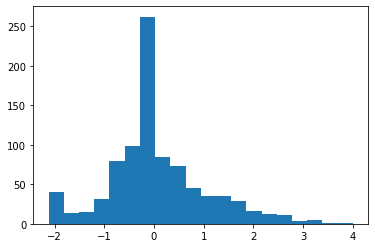

In [32]:
plt.hist(df_robust['Age'], bins = 20)

(array([562., 170.,  67.,  39.,  15.,  16.,   2.,   0.,   9.,   2.,   6.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([-0.62600478,  0.48343237,  1.59286952,  2.70230667,  3.81174382,
         4.92118096,  6.03061811,  7.14005526,  8.24949241,  9.35892956,
        10.46836671, 11.57780386, 12.68724101, 13.79667816, 14.90611531,
        16.01555246, 17.12498961, 18.23442675, 19.3438639 , 20.45330105,
        21.5627382 ]),
 <BarContainer object of 20 artists>)

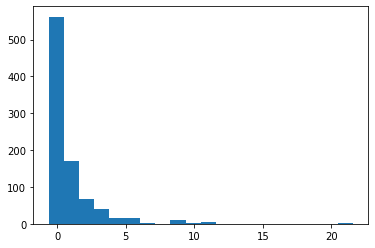

In [33]:
plt.hist(df_robust['Fare'], bins = 20)

## Gaussian Distribution
#### 1. Log Transform
The Log Transform is one of the most popular Transformation techniques out there. It is primarily used to convert a skewed distribution to a normal distribution/less-skewed distribution. In this transform, we take the log of the values in a column and use these values as the column instead.

In [34]:
df = pd.read_csv('titanic.csv', usecols = ['Age', 'Fare', 'Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [35]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [36]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [37]:
df.Age.fillna(df.Age.median(), inplace=True)

In [38]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [39]:
import scipy.stats as stat
import pylab

In [43]:
def plot_data(df, feature):
    plt.figure(figsize = (10, 8))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature], dist = 'norm', plot = pylab)
    plt.show()

NORMAL GRAPH


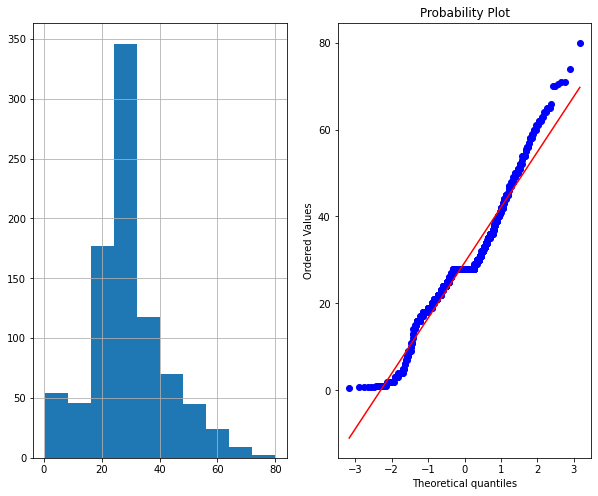

In [45]:
print('NORMAL GRAPH')
plot_data(df, 'Age')

LOG TRANSFORMATION


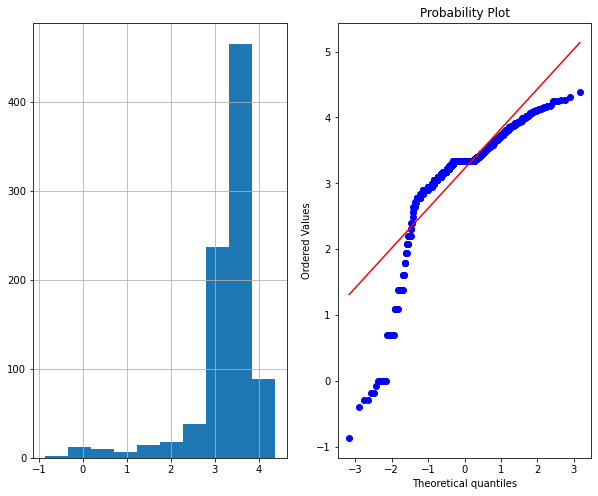

In [46]:
df['Age_log'] = np.log(df['Age'])
print('LOG TRANSFORMATION')
plot_data(df, 'Age_log')

## Reciprocal Transformation
<b>Defination: </b>The reciprocal transformation is a powerful transformation with a radical effect. The reciprocal reverses the order among values of the same sign, so large values become smaller. The negative reciprocal preserves the order among values of the same sign.
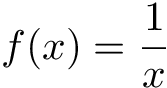

<b>You should note that this function is not defined for zero.<b>

RECIPROCAL TRANSFORMATION


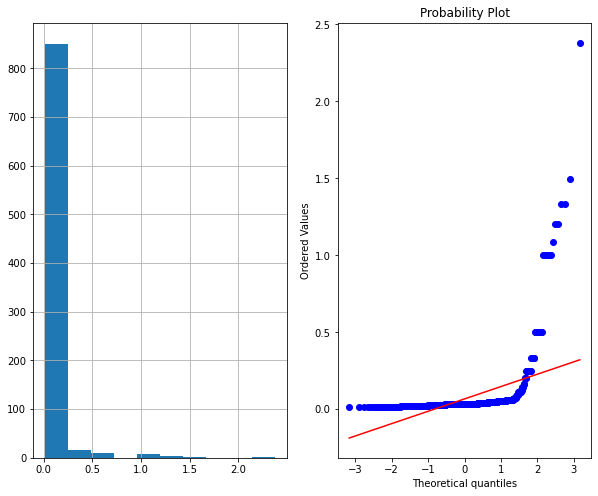

In [47]:
df['Age_Reciprocal'] = 1 / df.Age
print('RECIPROCAL TRANSFORMATION')
plot_data(df, 'Age_Reciprocal')

## Square root transformation
<b> Defination:</b> this one has an average effect on distribution shape: it’s weaker than logarithmic transformation, and it’s also used for reducing right-skewed distributions.
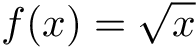


One particular advantage of square root transformation is that you can apply it to zero values.

<b>You should note that this function is defined only for positive numbers.

SQUARE ROOT TRANSFORMATION


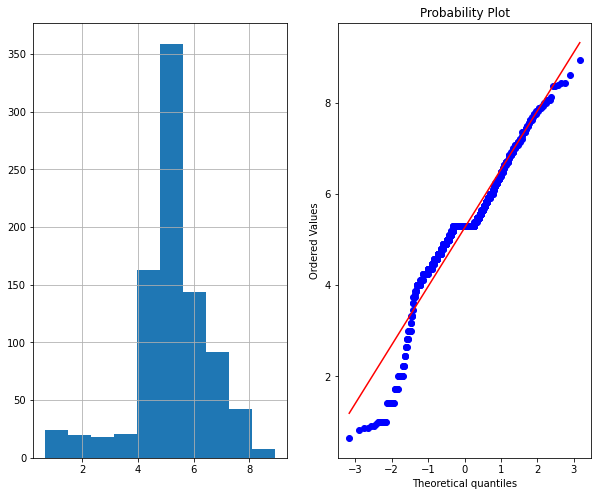

In [48]:
df['Age_Square'] = df.Age ** (1/2)
print('SQUARE ROOT TRANSFORMATION')
plot_data(df, 'Age_Square')

## Exponential or Power transformation
<b> Defination:</b> Power transformation has a reasonable effect on distribution shape; generally, we apply power transformation (power of two usually) to reduce left skewness.

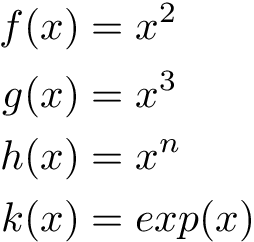

You can use any exponent in this transformation; you can even use the exp() function. Try and see which one gives you better results.


EXPONENTIAL TRANSFORMATION


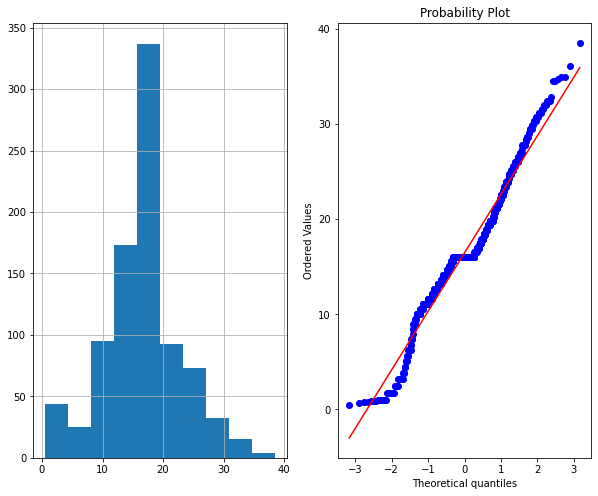

In [49]:
df['Age_Exponential'] = df['Age']**(1/1.2)
print('EXPONENTIAL TRANSFORMATION')
plot_data(df, 'Age_Exponential')

## Box-Cox transformation
<b> Defination:</b> Box-Cox is one of the most successful transformations; it’s an evolution of the exponential transformation, which looks through various exponents instead of trying them manually.

* By doing Box-Cox transformation, we’re searching and evaluating all the other transformations and choosing the best one.

* The exponent here is a variable called lambda (λ) that varies over the range of -5 to 5, and in the process of searching, we examine all values of λ. Finally, we choose the optimal value (resulting in the best approximation to a normal distribution) for your variable.

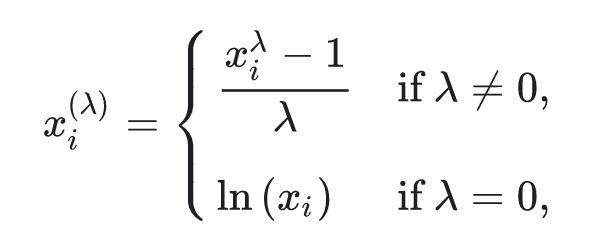

<b>You should note that this function is defined only for positive numbers.

In [53]:
df['Age_BoxCox'], parameters = stat.boxcox(df['Age'])

In [54]:
print(parameters)

0.7964531473656952


BOX-COX TRANSFORNMATION


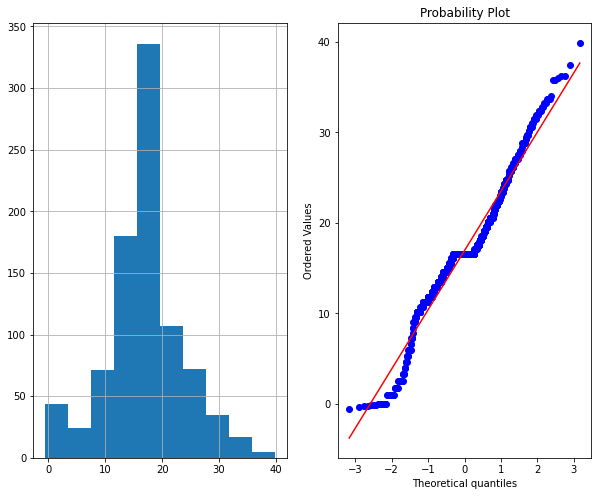

In [56]:
print('BOX-COX TRANSFORNMATION')
plot_data(df, 'Age_BoxCox')